# KELOMPOK 6 - PYTN - KS19

# A. Perkenalan

## 1. Latar Belakang

Penyakit Kardiovaskular (CVDs) adalah kategori penyakit yang melibatkan sistem kardiovaskular, yang terdiri dari jantung dan pembuluh darah. Penyakit Kardiovaskular (CVDs), yang merupakan penyebab utama kematian di seluruh dunia. CVDs memakan korban sekitar 17,9 juta jiwa setiap tahun, atau sekitar 31% dari total kematian global. Salah satu dampak umum dari CVDs adalah kegagalan jantung, yang dapat menjadi penyebab kematian.

Dalam menghadapi tantangan prediksi penyakit Kardiovaskular (CVDs) dan kegagalan jantung, pendekatan terbaik melibatkan konsep Classification dengan penggunaan ensemble model. Tahap awal melibatkan persiapan data yang seksama, termasuk pengolahan dan pembersihan data, pembagian dataset, dan transformasi data yang diperlukan. Dengan data yang siap, implementasi ensemble model, seperti Random Forest atau Gradient Boosting, dijalankan untuk melakukan prediksi yang akurat terkait risiko dan kemungkinan munculnya penyakit kardiovaskular pada individu tertentu. Pemilihan ensemble model yang cermat dan pengoptimalkan parameter memainkan peran kunci dalam memastikan prediks

## 2. Dataset

Analisis ini menggunakan data yang bersumber dari Kaggle yaitu <a href ="https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data" tittle = "Heart Failure Prediction">**Heart Failure Prediction**</a>. Kumpulan data ini berisi 299 baris dan 13 kolom.

## 3. Tujuan

Project ini dibuat guna mengevaluasi konsep ensemble sebagai berikut:
* Mampu memahami konsep Classification dengan Ensemble Model
* Mampu mempersiapkan data untuk digunakan dalam Ensemble Model
* Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# B. Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
seed = 13

# C. Data Loading

In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

> dari informasi data frame kita dapat melihat bahwa tidak ada nilai yang hilang pada dataset tersebut. dan tidak ada data kategorikal. setidaknya tidak dalam bentuk nilai numerik.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


> dari ukuran tendensi sentral terlihat bahwa beberapa kolom mempunyai nilai yang sangat tinggi. tapi apakah itu sebuah hal yang aneh?
> kurasa kita akan mengetahuinya.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


> mari kita lihat kardinalitas kolomnya. dan dari sini kami menemukan bahwa banyak kolom yang sebenarnya merupakan data kategorikal. dikodekan pada nilai biner. jadi kami akan menandainya sebagai data kategorikal. untuk menggunakannya dengan lebih baik di masa depan

In [6]:
for col in df.columns:
    print(f'{col}'.ljust(24), f"{len(df[col].unique())}".rjust(8), 'Unique Values')

age                            47 Unique Values
anaemia                         2 Unique Values
creatinine_phosphokinase      208 Unique Values
diabetes                        2 Unique Values
ejection_fraction              17 Unique Values
high_blood_pressure             2 Unique Values
platelets                     176 Unique Values
serum_creatinine               40 Unique Values
serum_sodium                   27 Unique Values
sex                             2 Unique Values
smoking                         2 Unique Values
time                          148 Unique Values
DEATH_EVENT                     2 Unique Values


> ## Perbaikan Tipe
> mari kita perbaiki tipe data yang dikodekan sebagai int ke data kategorikal.

In [7]:
category_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

for col in category_cols:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

# D. Explorasi Data
> jika kita menginginkan performa model yang baik, kita harus memulai dari tempat yang tepat. dan itu dimulai dengan memahami data

> ## Numerical Feature

In [8]:
def maximum_normalize_residual_test(sample, alpha=0.05, verbose=False):
    n_sample = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)

    g_calculated = np.max(np.abs(sample - sample_mean)) / sample_std

    t_value = stats.t.ppf(1 - (alpha / (2 * n_sample)), n_sample - 2)
    g_crit = ((n_sample - 1) * np.sqrt(np.square(t_value)))
    g_crit /= (np.sqrt(n_sample) * np.sqrt(n_sample - 2 + np.square(t_value)))

    if verbose:
        print(f'Grubbs Statistic: {g_calculated:.3f}')
        print(f'Critical Value: {g_crit:.3f}')
        if g_crit > g_calculated:
            print("Accept Null Hypothesis, H0 : Sample doesn't contain outliers")
        else:
            print("Reject Null Hypothesis, H1 : Sample contains outliers")

    return g_calculated > g_crit

In [9]:
def class_distribution(df, col, target, labels: dict):
    _space = np.linspace(df[col].min(), df[col].max(), 100)

    dists = {}
    for c in labels:
        dists[labels[c]] = stats.gaussian_kde(df[df[target] == c][col])(_space)

    return _space, dists

In [10]:
def plot_distribution(df, col, target='DEATH_EVENT', labels=None):
    df = df.copy()
    labels = labels or {0: 'Negative', 1: 'Positive'}

    fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6))

    _space, _probs = class_distribution(df, col, target, labels)

    for c, p in _probs.items():
        ax[0].plot(_space, p)
    ax[0].plot(_space, np.sum([_probs[c] for c in _probs], axis=0), 'g--')

    ax[1].boxplot([df[df[target] == c][col] for c in labels])

    ax[0].axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    ax[0].axvline(df[col].median(), color='y', linestyle='--', label='Median')

    ax[0].legend([label for label in labels.values()] + ['Histogram', 'Mean', 'Median'])
    ax[0].set_title(f'{col.title()} Distribution')

    maximum_normalize_residual_test(df[col], verbose=True)

>> ### Age
>> Dari histogram kita dapat melihat bahwa usia mempunyai korelasi dengan target kita, kita dapat mengatakan demikian karena ada perbedaan antara usia orang yang meninggal dan usia orang yang tidak meninggal. dalam hal ini kelompok usia 40-60 tahun memiliki angka kelas negatif yang lebih tinggi dibandingkan kelompok usia lebih dari 60 tahun. jadi dari fitur ini kita punya petunjuk tentang kemungkinan kematian mereka. dan tidak ada outlier yang terdeteksi pada fitur ini.

Grubbs Statistic: 2.877
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


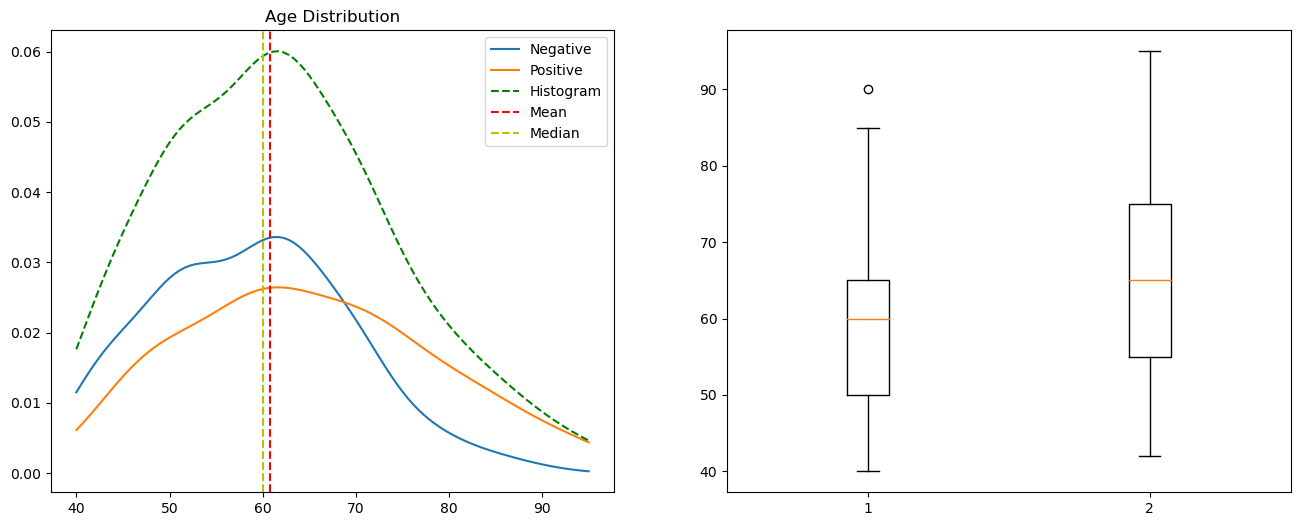

In [11]:
plot_distribution(df, 'age')

>> ### Creatinine Phosphokinase
>> Fitur yang kami amati ini memiliki distribusi yang hampir sama pada dua kelas. jadi kita dapat mengatakan bahwa kreatinin fosfokinase tidak ada korelasinya dengan target.
>> tapi tetap saja saya akan memberikan beberapa perubahan pada fitur ini untuk melanjutkan ke pemilihan fitur. jadi untuk saat ini saya akan mengubahnya menjadi distribusi yang lebih normal.

Grubbs Statistic: 7.515
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


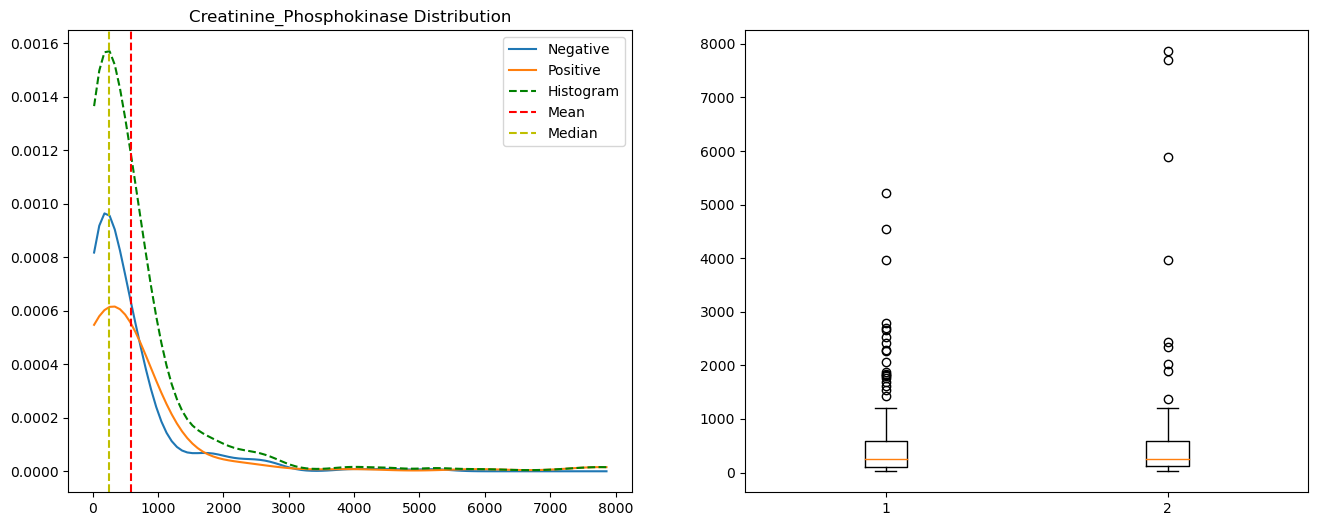

In [12]:
plot_distribution(df, 'creatinine_phosphokinase')

>> ### Ejection Fraction
>> fitur ini mewakili fraksi ejeksi pasien. fitur ini mungkin memiliki perbedaan probabilistik antara kelas positif dan negatif.
>> kelas positif cenderung memiliki fraksi ejeksi yang lebih rendah dibandingkan kelas negatif. jadi kita dapat mengatakan bahwa fraksi ejeksi mempunyai korelasi dengan target.

Grubbs Statistic: 3.548
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


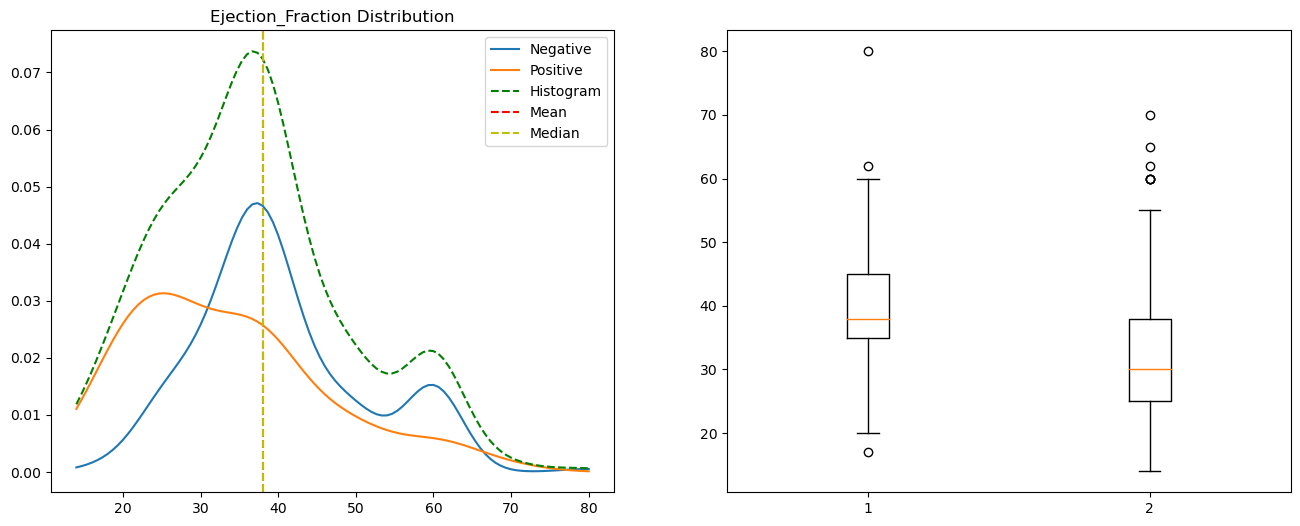

In [13]:
plot_distribution(df, 'ejection_fraction')

>> ### Platelets
>> dari pandangan pertama fitur ini merupakan distribusi normal tetapi setelah dilakukan pemisahan kelas kita dapat melihat bahwa distribusinya tumpang tindih. dan itu tidak bagus untuk model kita. karena kita membutuhkan kelas yang didistribusikan secara berbeda dan tidak terlalu banyak tumpang tindih.

Grubbs Statistic: 6.008
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


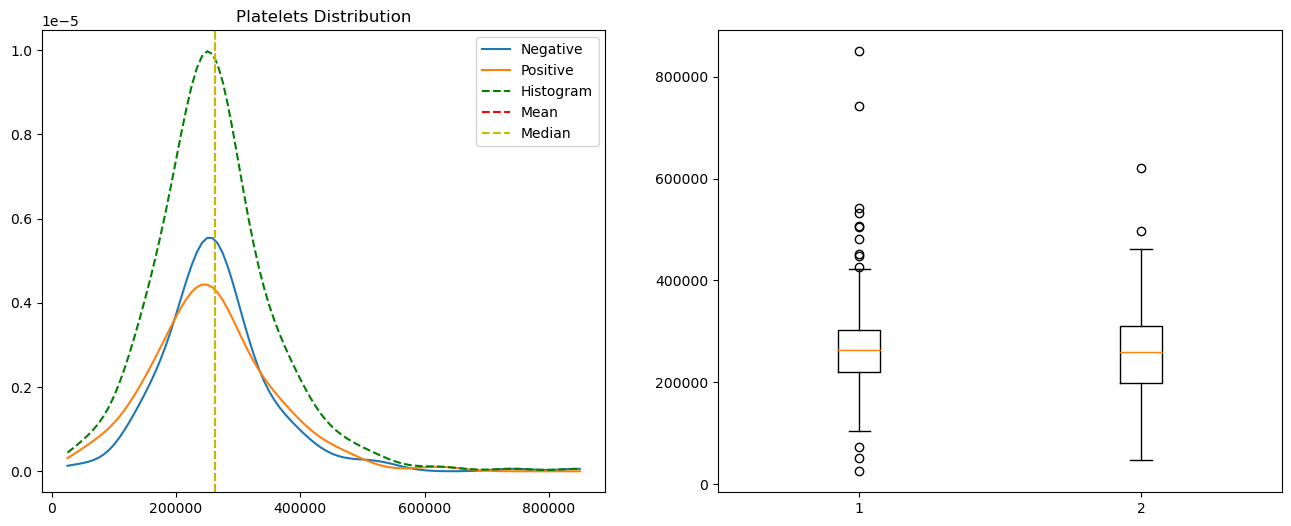

In [14]:
plot_distribution(df, 'platelets')

>> ### Serum Creatinine
>> Fitur ini tentang , dari visualisasi kita dapat melihat bahwa distribusi kelas memiliki beberapa tumpang tindih tetapi memiliki mean yang berbeda dan di beberapa wilayah mereka tidak terlalu tumpang tindih.

Grubbs Statistic: 7.752
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


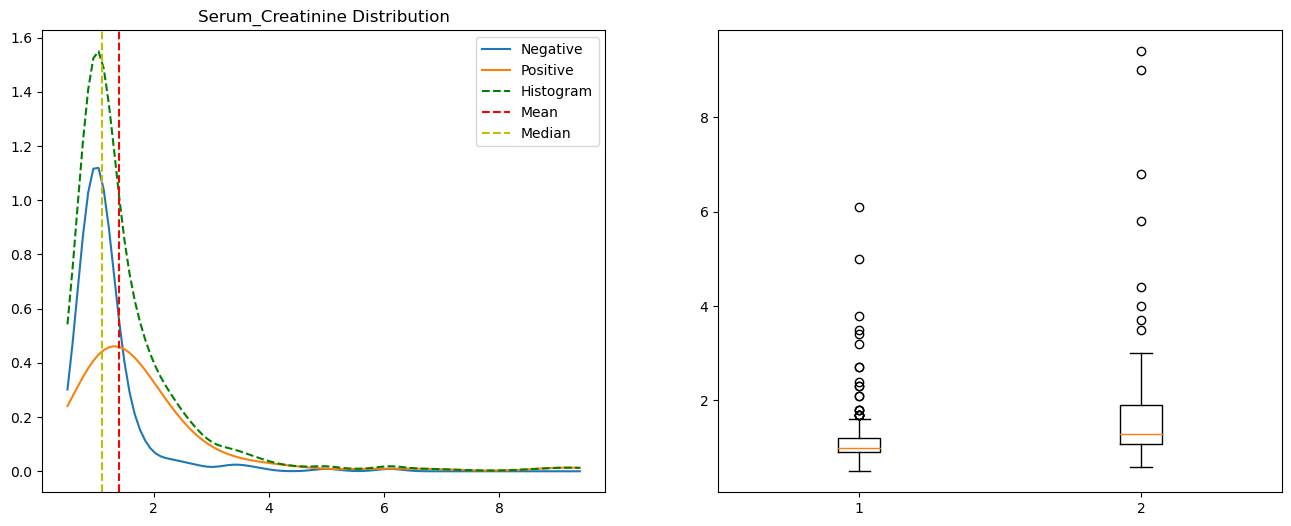

In [15]:
plot_distribution(df, 'serum_creatinine')

>> ### Serum Sodium
>> dari visualisasi terlihat bahwa fitur `serum_sodium` mempunyai sebaran yang cukup baik pada kelas sasaran, dapat dikatakan demikian karena hanya ada satu puncak sebaran untuk setiap kelas, dan rata-ratanya berbeda. jadi kami dapat menyimpulkan bahwa fitur ini adalah salah satu fitur terpenting untuk model kami.

Grubbs Statistic: 5.363
Critical Value: 3.723
Reject Null Hypothesis, H1 : Sample contains outliers


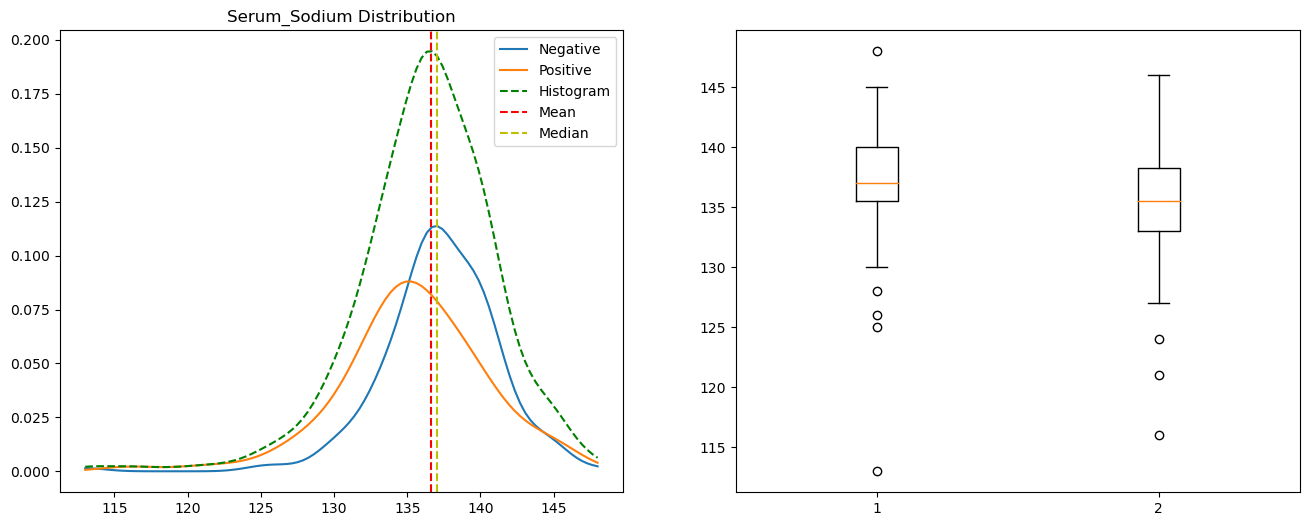

In [16]:
plot_distribution(df, 'serum_sodium')

>> ### Time
>> Saya masih kurang paham tentang representasi kolom ini karena kolom ini mempunyai korelasi yang sangat tinggi dengan target namun bagaimana hal itu terjadi masih ada bagian yang hilang. tetapi jika saya menemukan fitur ini tidak mungkin diperoleh sebelum masa hidup pasien berakhir, saya harus menghilangkan fitur ini untuk membuat kumpulan data ini lebih realistis.

Grubbs Statistic: 1.997
Critical Value: 3.723
Accept Null Hypothesis, H0 : Sample doesn't contain outliers


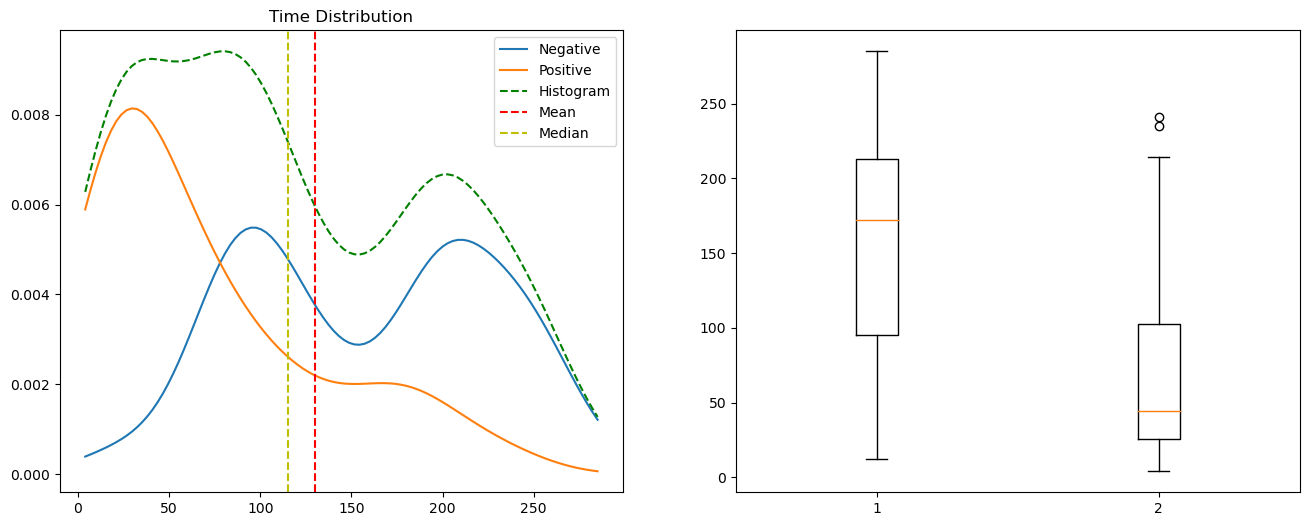

In [17]:
plot_distribution(df, 'time')

> ## Categorical Features
> Karena kumpulan data ini hanya berisi kategori biner, kami akan mengamati semuanya sekaligus untuk menghemat waktu.

In [18]:
def plot_categorical_dist(df, columns: list, target='DEATH_EVENT'):
    fig, ax = plt.subplots(1, len(columns), figsize=(8 * len(columns), 6))

    for i, column in enumerate(columns):
        ax[i].set_title(column)
        ax[i].hist(df[df[target] == 0][column], bins=2, histtype='step', label='Negative', density=True)
        ax[i].hist(df[df[target] == 1][column], bins=2, histtype='step', label='Positive', density=True)
        ax[i].legend()

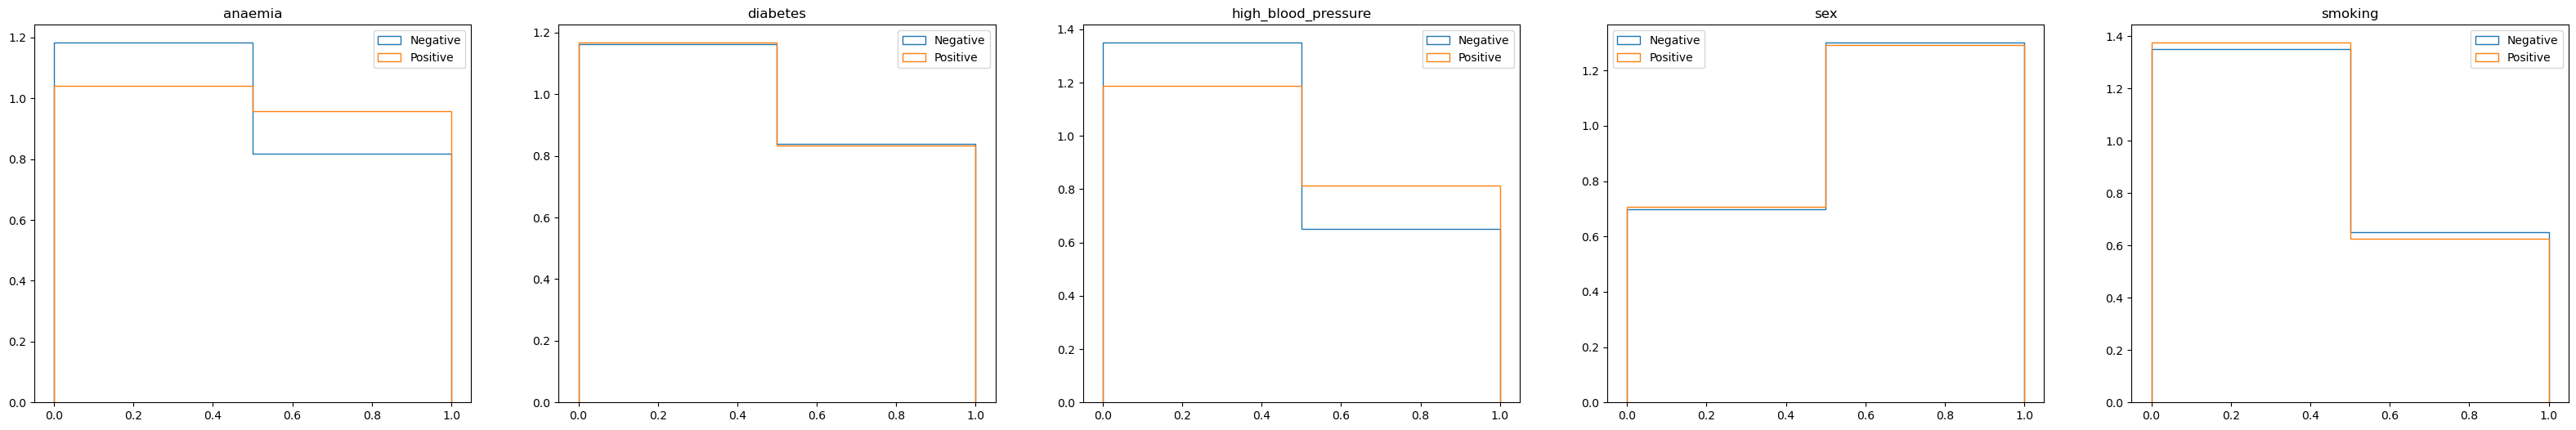

In [19]:
plot_categorical_dist(df, ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])

>> Dari plot kita dapat melihat bahwa kolom kategori yang kita miliki tidak memberikan korelasi yang baik terhadap target karena mereka melebihi probabilitas pada 2 kelas, tapi saya akan menilai apa yang penting dan bukan dari peringkat korelasi agar adil dan tidak bias pada sudut pandang saya.

> ## Feature Correlation
> setelah kami menyelidiki pada tingkat individual fitur kami, kami akan mencoba menemukan korelasi antar variabel apakah variabel tersebut berisi informasi yang sama.
> tetapi dari pengamatan kami saya tidak melihat fitur yang memiliki korelasi terlalu kuat dengan fitur lainnya hanya ada satu fitur yang memiliki korelasi 0,45 dengan fitur lainnya yaitu `seks` dan `merokok` tetapi masih belum meyakinkan saya bahwa keduanya tidak membawa informasi tambahan secara individual jadi dalam hal ini saya akan menyimpan kolom tersebut jika kolom tersebut memiliki korelasi yang cukup dengan target

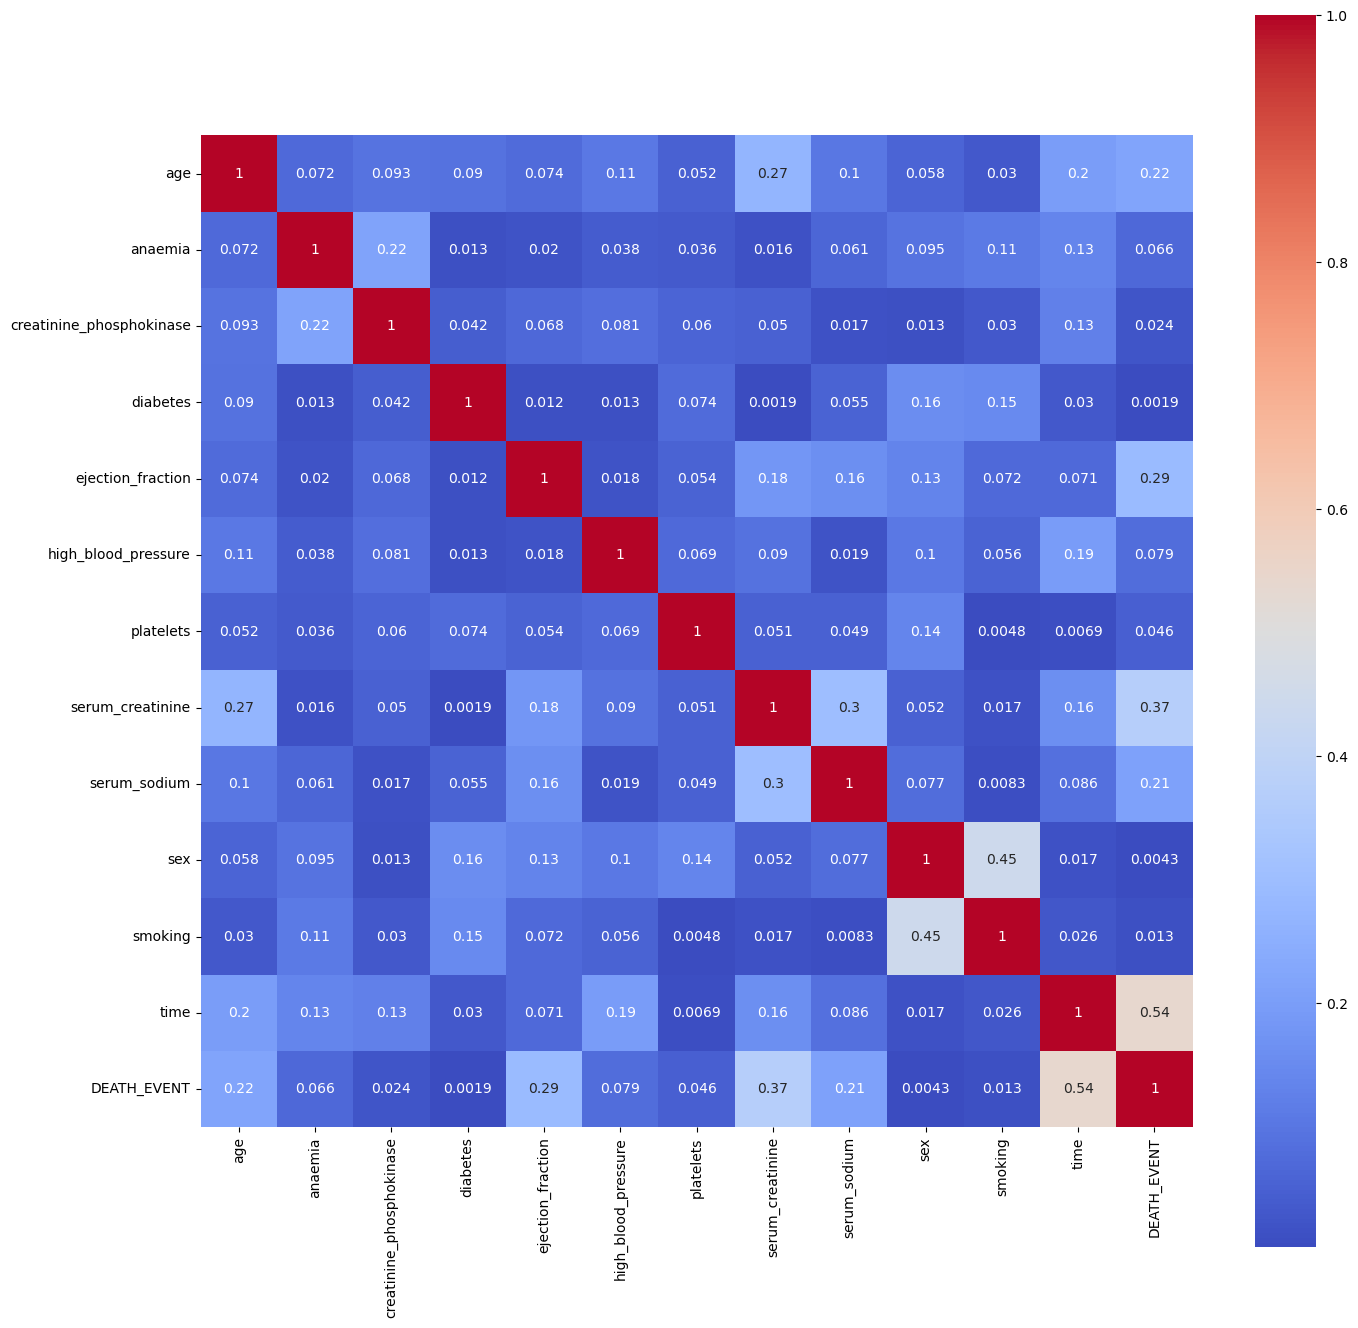

In [20]:
_df = df.copy()
_df[_df.select_dtypes('category').columns] = _df[_df.select_dtypes('category').columns].apply(lambda col: col.cat.codes)
_corr = _df.corr(method='spearman').abs()

plt.figure(figsize=(8 * 2, 8 * 2))
sns.heatmap(_corr, cmap='coolwarm', annot=True, square=True);

> ## Feature Selection
> di bagian ini saya akan menjabarkan fitur terpenting untuk melatih model kita agar model menjadi ramping dan tidak overfitting.
> seperti yang kita lihat hanya ada 5 kolom yang memiliki korelasi wajar dengan target.
> jadi saya akan menyimpan kolom berikut:
> - ~~time~~
> - serum_creatinine
> - ejection_fraction
> - age
> - serum_sodium

> **Catatan**:
> Setelah beberapa informasi ditemukan saya akan menghilangkan kolom waktu karena tidak mungkin memperoleh informasi tersebut sebelum akhir hidup pasien atau pada waktu prediksi.

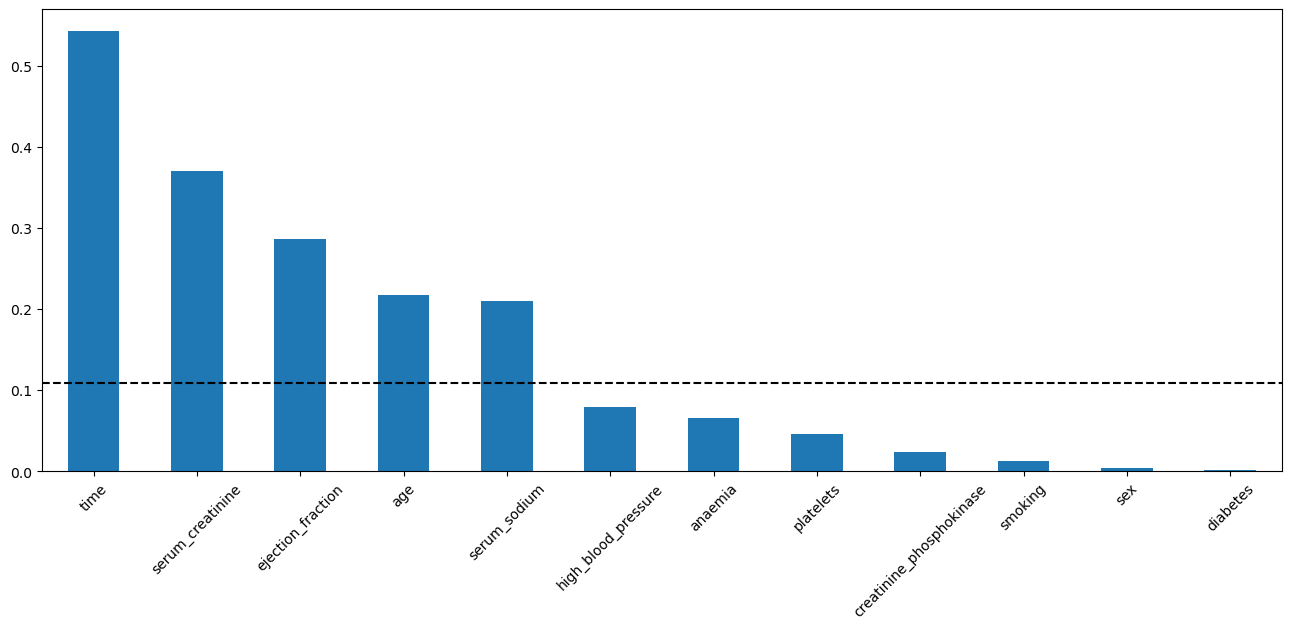

In [21]:
_corr = _df.corr(method='spearman').abs()['DEATH_EVENT'].sort_values(ascending=False).drop('DEATH_EVENT')
lower_corr_threshold = _corr.max() / 5

plt.figure(figsize=(8 * 2, 6))

_corr.plot.bar()
plt.axhline(lower_corr_threshold, color='black', linestyle='--')
plt.xticks(rotation=45);

# E. Data Preprocessing
> Setelah setiap fitur dianalisis, dan kami memutuskan fitur apa yang ingin kami pertahankan, kami akan mulai memproses data terlebih dahulu.
> karena proyek ini mengharuskan kita menggunakan model dasar pohon, saya tidak akan melakukan standarisasi apa pun pada data karena tidak masuk akal untuk model pohon.

In [22]:
selected_features = ['serum_creatinine', 'ejection_fraction', 'age', 'serum_sodium']
preprocessing_pipeline = ColumnTransformer([('feature', 'passthrough', selected_features)])

create_pipeline = lambda model: Pipeline(
    [
        ('preprocessing', preprocessing_pipeline),
        ('model', model)
    ]
)

> ## Cross Validation Split
> pada bagian ini kita akan membagi data kita menjadi 3 bagian dan bagian tersebut adalah pelatihan, validasi dan pengujian dan usahakan proporsi setiap bagian tetap sama.

In [23]:
x = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed, stratify=y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)

> dari sini kita dapat melihat bahwa dataset yang kita bagi hanya berisi sedikit sampel di dalam bagian pelatihan, validasi, dan pengujian.

In [24]:
print(f"x_train: {x_train.shape}")
print(f"x_val: {x_val.shape}")
print(f"x_test: {x_test.shape}")

x_train: (215, 12)
x_val: (54, 12)
x_test: (30, 12)


In [25]:
train_ds, val_ds, test_ds = (x_train, y_train), (x_val, y_val), (x_test, y_test)

# F. Pendefinisian Model
> saatnya mendefinisikan model kita.
> Saya akan mendefinisikan 2 model untuk dataset ini, yang satu adalah Random Forest dan yang lainnya adalah Gradient Boosting.

> **Random Forest**
> Random Forest atau Pohon keputusan acak adalah metode pembelajaran ansambel untuk klasifikasi, regresi, dan tugas-tugas lain yang beroperasi dengan membangun banyak pohon keputusan pada waktu pelatihan. Untuk tugas klasifikasi, keluaran dari hutan acak adalah kelas yang dipilih oleh sebagian besar pohon.

> **Gradient Boosting**
> Gradient boosting adalah teknik pembelajaran mesin yang digunakan antara lain dalam tugas regresi dan klasifikasi. Ini memberikan model prediksi dalam bentuk kumpulan model prediksi lemah, yang biasanya berupa pohon keputusan. Jika pohon keputusan merupakan pembelajar yang lemah, algoritma yang dihasilkan disebut pohon yang ditingkatkan gradien; biasanya kinerjanya melebihi hutan acak. Model pohon dengan peningkatan gradien dibangun secara bertahap seperti pada metode peningkatan lainnya, namun model ini menggeneralisasi metode lain dengan memungkinkan optimalisasi fungsi kerugian yang dapat dibedakan secara arbitrer.

> karena kami hanya menggunakan 2 model, saya akan mencoba mencari parameter terbaik untuk setiap model.

In [26]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=seed,
)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=9,
    min_samples_leaf=5,
    min_samples_split=7,
    max_features='sqrt',
    random_state=seed,
)

gb_model = create_pipeline(gb_model)
rf_model = create_pipeline(rf_model)

# G. Pelatihan Model


In [27]:
def find_hyper_parameter(model, param_grid, dataset):
    grid_search = GridSearchCV(
        model,
        param_grid=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1
    )
    grid_search.fit(*dataset)
    return grid_search.best_estimator_, grid_search.cv_results_

> mari kita mulai dengan penyetelan hyperparameter. di sini kami mendeklarasikan n_estimators dan max_ depth. untuk mendapatkan yang terbaik dari model kami dalam kumpulan data ini

In [28]:
rf_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
}

gb_params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
}

In [29]:
rf_model, rf_scores = find_hyper_parameter(rf_model, rf_params, train_ds)
gb_model, gb_scores = find_hyper_parameter(gb_model, gb_params, train_ds)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


> dan berikut adalah param terbaik yang didapat dari pencarian diatas

In [30]:
rf_model[-1], gb_model[-1]

(RandomForestClassifier(max_depth=3, random_state=13),
 GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=5,
                            min_samples_split=7, random_state=13))

> ## Grid Search Score
> dari metrik ini saja saya dapat mengatakan bahwa model tersebut berperforma baik tetapi serupa dengan model lainnya.

In [31]:
print(f"Random Forest: Score - {np.mean(rf_scores['mean_test_score']):.3f}, Var - {np.mean(rf_scores['std_test_score']):.3f}")

Random Forest: Score - 0.779, Var - 0.063


In [32]:
print(f"Gradient Boost: Score - {np.mean(gb_scores['mean_test_score']):.3f}, Var - {np.mean(gb_scores['std_test_score']):.3f}")

Gradient Boost: Score - 0.726, Var - 0.049


# H. Evaluasi Model
> setelah semua dilatih saya akan mengevaluasi model dan melihat mana yang terbaik. dan terus menyempurnakan model untuk menyelesaikan tujuan kami.
> dan saya akan menggunakan `mae` dan `mse` untuk mengukur kerugian setiap model dan menggunakan `acc`, `prec`, `recall` dan `f1` untuk mengukur kinerja model.

In [33]:
def calculate_metrics(model, dataset: (x, y), prefix, threshold=0.5):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    _y = _y > threshold

    acc = metrics.accuracy_score(y, _y)
    f1 = metrics.f1_score(y, _y)
    prec = metrics.precision_score(y, _y)
    rec = metrics.recall_score(y, _y)

    mse = metrics.mean_squared_error(y, _y)
    mae = metrics.mean_absolute_error(y, _y)

    print(f"""{prefix}
    Accuracy : {acc:.2f}, F1 : {f1:.2f}, Precision : {prec:.2f}, Recall : {rec:.2f}
    MSE : {mse:.2f}, MAE : {mae:.2f}
    """)

In [34]:
def display_roc(model, dataset: (x, y), name, ax=plt):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    metrics.RocCurveDisplay.from_predictions(y, _y, name=name, ax=ax)

In [35]:
def plot_precision_recall(model, dataset: (x, y), name, ax=plt):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]
    ax.plot([0, 1], [1, 0], color='gray', linestyle='--')
    metrics.PrecisionRecallDisplay.from_predictions(y, _y, name=name, ax=ax)

In [36]:
def plot_precision_recall_space(model, dataset: (x, y), name):
    x, y = dataset
    _y = model.predict_proba(x)[:, 1]

    reports = []

    for t in np.arange(0, 1, .01):
        output = _y > t

        precision = metrics.precision_score(y, output, zero_division=0)
        recall = metrics.recall_score(y, output, zero_division=0)

        reports.append({
            'treshold': t,
            'precision': precision,
            'recall': recall,
        })

    reports = pd.DataFrame(reports)
    plt.figure(figsize=(8, 6))
    plt.plot(reports['treshold'], reports['precision'], label='Precision')
    plt.plot(reports['treshold'], reports['recall'], label='Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Score')
    plt.title(name)
    plt.legend()

    return reports

> ## Cross Validation

>> ### Random Forest
>> seperti yang kita lihat bahwa model ini berkinerja baik dan tidak melakukan overfitting pada data. dan ini merupakan indikasi bagus bahwa model tersebut akan berkinerja baik di masa depan.

In [37]:
calculate_metrics(rf_model, dataset=train_ds, prefix='Random Forest - Train')
calculate_metrics(rf_model, dataset=val_ds, prefix='Random Forest - Validation')

Random Forest - Train
    Accuracy : 0.82, F1 : 0.67, Precision : 0.83, Recall : 0.57
    MSE : 0.18, MAE : 0.18
    
Random Forest - Validation
    Accuracy : 0.80, F1 : 0.56, Precision : 0.88, Recall : 0.41
    MSE : 0.20, MAE : 0.20
    


>> ### Gradient Boost
>> Model ini berkinerja sangat baik dalam pelatihan tetapi dari apa yang kita lihat bahwa model tersebut tidak terlalu akurat pada kumpulan data validasi, hal ini karena masalah model basis pohon yang umum yaitu model tersebut selalu terlalu sesuai dengan data.

In [38]:
calculate_metrics(gb_model, dataset=train_ds, prefix='Gradient Boosting - Train')
calculate_metrics(gb_model, dataset=val_ds, prefix='Gradient Boosting - Validation')

Gradient Boosting - Train
    Accuracy : 0.90, F1 : 0.83, Precision : 0.90, Recall : 0.77
    MSE : 0.10, MAE : 0.10
    
Gradient Boosting - Validation
    Accuracy : 0.80, F1 : 0.65, Precision : 0.71, Recall : 0.59
    MSE : 0.20, MAE : 0.20
    


> ## AUC-ROC and Precision-Recall Curve
> setelah menilai performa model dengan angkanya saja kita akan melihat apakah pernyataan saya sebelumnya masih berlaku di Kurva ini.
> seperti yang kita lihat kedua model hampir memiliki performa yang sama tetapi saya akan memilih model Random Forest karena modelnya lebih sederhana dan performa AUC-ROC lebih baik daripada Gradient Boosting.
> jadi setelah ini saya hanya akan melanjutkan dengan model hutan acak.

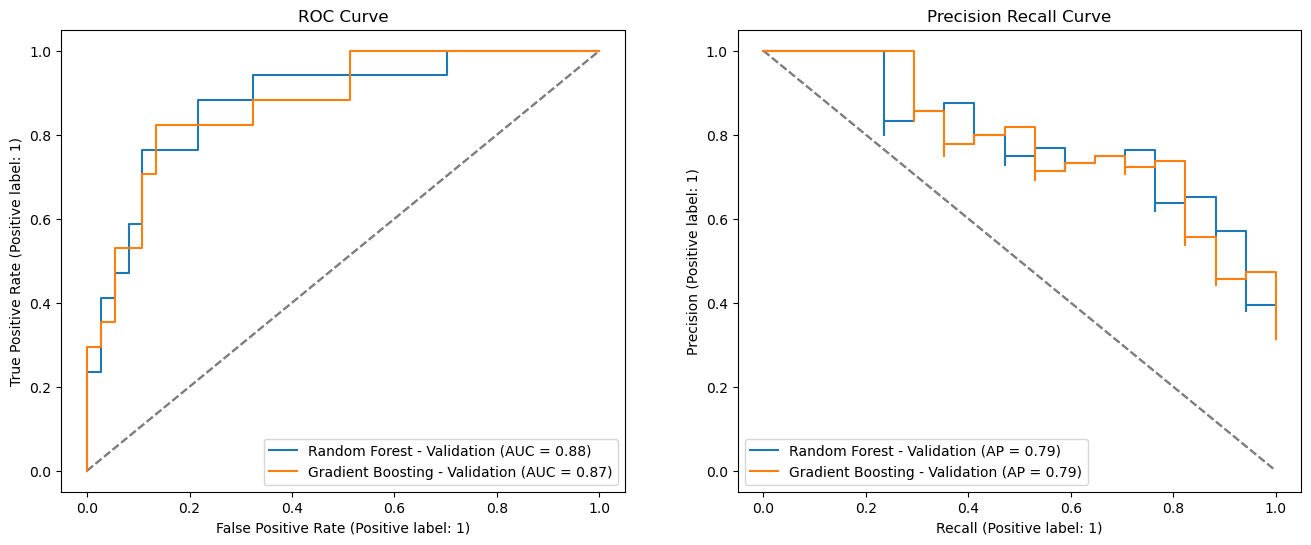

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(8 * 2, 6))

display_roc(rf_model, dataset=val_ds, name='Random Forest - Validation', ax=ax[0])
display_roc(gb_model, dataset=val_ds, name='Gradient Boosting - Validation', ax=ax[0])

plot_precision_recall(rf_model, dataset=val_ds, name='Random Forest - Validation', ax=ax[1])
plot_precision_recall(gb_model, dataset=val_ds, name='Gradient Boosting - Validation', ax=ax[1])

ax[0].set_title('ROC Curve')
ax[1].set_title('Precision Recall Curve');

> ## Threshold Selection
> oke setelah kita melihat bagaimana kinerja model kita pada metrik tersebut, kita memerlukan cara untuk mengimplementasikan model tersebut ke dalam domain masalah kita, jadi apa masalahnya? kita perlu menangkap sebanyak mungkin pasien kritis sebelum hal buruk terjadi pada mereka. jadi saya akan menukar presisi saya untuk penarikan kembali. dalam hal ini perolehan 80% akan bagus karena kinerja model pada AUC ROC sebelumnya

> mari kita mulai dengan menggeser ambang batas dari 0 ke 1 dan menghitung perolehan kembali untuk setiap ambang batas. lalu pilih nilai ambang batas yang tepat untuk memaksimalkan perolehan kembali.

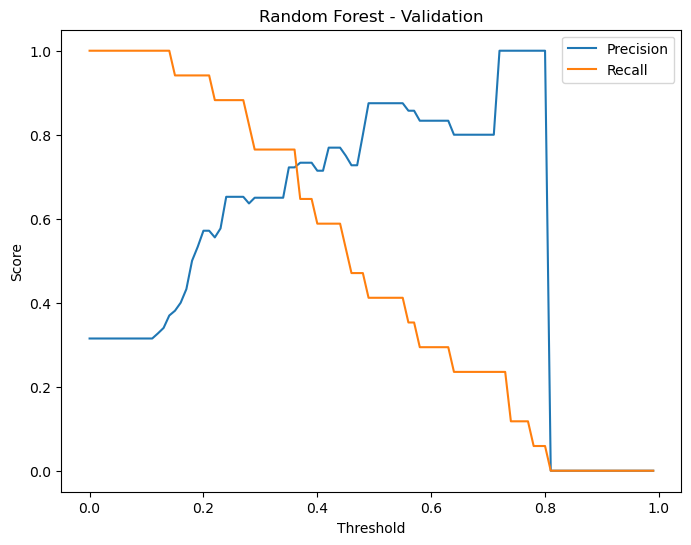

In [40]:
scores = plot_precision_recall_space(rf_model, dataset=val_ds, name='Random Forest - Validation')

> oke setelah melihat kembali pilihan ambang batas kita dapat melihat bahwa ambang batas yang memaksimalkan penarikan kembali adalah 0,2 mengapa nilainya karena ketika kita menggambar garis lurus dari y=0 ke y=1 kita dapat melihat bahwa penarikan kembali adalah 1. dan presisinya adalah .33. jadi ambang batas yang memaksimalkan recall adalah 0,2. tapi apakah penilaianku benar? kita perlu memplot dan menghitung presisi dan perolehan dari ambang batas yang dipilih.

In [41]:
threshold = .2

<Figure size 800x600 with 0 Axes>

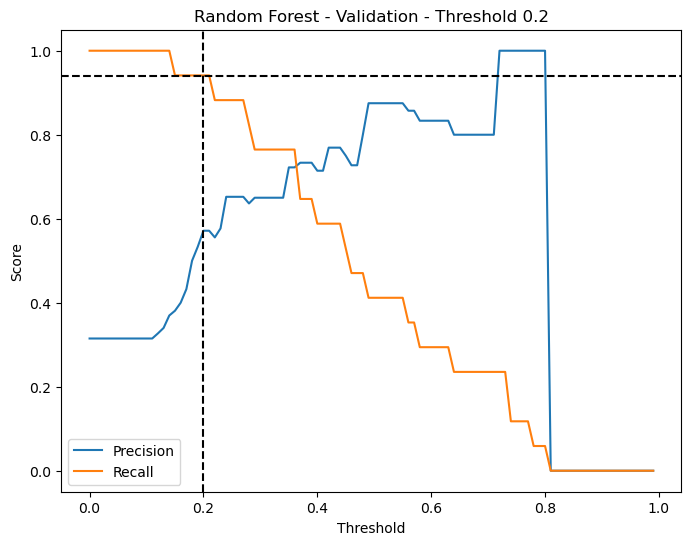

In [42]:
plt.figure(figsize=(8, 6))
plot_precision_recall_space(rf_model, dataset=val_ds, name=f'Random Forest - Validation - Threshold {threshold}')
plt.axvline(x=threshold, color='k', linestyle='--')
plt.axhline(.94, color='k', linestyle='--')
plt.legend()
plt.show();

In [43]:
_y = rf_model.predict_proba(x_val)[:, 1] > threshold
print(classification_report(y_val, _y))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79        37
           1       0.57      0.94      0.71        17

    accuracy                           0.76        54
   macro avg       0.77      0.81      0.75        54
weighted avg       0.84      0.76      0.77        54



> ## Conclusion
> dari garis baru yang kita gambar dan dari perhitungan numerik terlihat bahwa asumsi kita sebelumnya benar. bahwa kita akan memiliki sekitar 94% recall dan 57% presisi. jadi mari kita mulai simulasi untuk melihat performa model kita di dunia nyata.

# I. Model Inference
> di bagian ini kita akan melakukan simulasi di dunia nyata ketika kita menghadapi masalah di alam liar, katakanlah kita mempunyai 30 pasien dan kita perlu menangkap mereka yang memiliki risiko kematian lebih tinggi dalam waktu dekat karena masalah kebakaran. dan dari data simulasi kita dapat melihat mereka terdiri dari 20 pasien negatif dan 10 pasien positif. dan kita perlu menangkap pasien positif.

In [44]:
print(f"Total Patient : {len(x_test)}")
print(f"Negative Patient : {len(y_test[y_test == 0])}")
print(f"Positive Patient : {len(y_test[y_test == 1])}")

Total Patient : 30
Negative Patient : 20
Positive Patient : 10


> siapkan kumpulan data ke dalam format yang mudah dibaca untuk kami analisis

In [45]:
_x_test = x_test.copy()
_x_test['actual'] = np.asarray(y_test, bool)
_x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,actual
45,50.000,0,582,1,38,0,310000.00,1.90,135,1,1,35,True
270,44.000,0,582,1,30,1,263358.03,1.60,130,1,1,244,False
53,70.000,1,69,1,50,1,351000.00,1.00,134,0,0,44,True
122,60.000,0,96,1,38,0,228000.00,0.75,140,0,0,95,False
248,40.000,0,624,0,35,0,301000.00,1.00,142,1,1,214,False
216,70.000,0,1202,0,50,1,358000.00,0.90,141,0,0,196,False
79,55.000,0,336,0,45,1,324000.00,0.90,140,0,0,74,False
281,70.000,0,582,0,40,0,51000.00,2.70,136,1,1,250,False
242,40.000,0,90,0,35,0,255000.00,1.10,136,1,1,212,False
296,45.000,0,2060,1,60,0,742000.00,0.80,138,0,0,278,False


> melakukan prediksi probabilitas untuk masing-masing pasien

In [46]:
_x_test = x_test.copy()
_x_test['prediction'] = rf_model.predict_proba(_x_test)[:, 1] > threshold

> pilih pasien yang mempunyai kemungkinan tertinggi untuk menjadi positif dan karantina mereka, sehingga kita memiliki peluang lebih besar untuk mengetahui kapan jantung mereka mulai gagal dan mengobatinya sebelum terlambat. seperti yang bisa kita lihat, model tersebut memperkirakan bahwa dari 30 pasien, hanya 15 pasien yang memiliki kemungkinan lebih tinggi untuk menjadi positif dan memerlukan observasi medis.

In [47]:
_x_test['actual'] = np.asarray(y_test, bool)
_y_test = y_test[_x_test['prediction'] == True]
_x_test = _x_test[_x_test['prediction'] == True]
_x_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,prediction,actual
45,50.000,0,582,1,38,0,310000.00,1.9,135,1,1,35,True,True
270,44.000,0,582,1,30,1,263358.03,1.6,130,1,1,244,True,False
281,70.000,0,582,0,40,0,51000.00,2.7,136,1,1,250,True,False
185,60.667,1,104,1,30,0,389000.00,1.5,136,1,0,171,True,True
37,82.000,1,855,1,50,1,321000.00,1.0,145,0,0,30,True,True
158,85.000,1,910,0,50,0,235000.00,1.3,134,1,0,121,True,False
93,60.000,1,154,0,25,0,210000.00,1.7,135,1,0,82,True,True
58,49.000,0,789,0,20,1,319000.00,1.1,136,1,1,55,True,True
217,54.000,1,427,0,70,1,151000.00,9.0,137,0,0,196,True,True
282,42.000,0,64,0,30,0,215000.00,3.8,128,1,1,250,True,False


> oke, mari kita hitung kinerja model kita dengan kumpulan data simulasi
> inilah yang kami dapatkan dari simulasi
> - kita dapat mengidentifikasi 80% pasien positif dan 20% pasien salah klasifikasi. ini adalah peningkatan besar dalam perspektif akurasi ketika membandingkannya dengan peluang acak
> - kita dapat melihat bahwa kita berhasil memilih jumlah pasien dalam periode observasi dan menghemat waktu dan uang operasi medis dengan hanya mengorbankan 20% pasien positif.

> ringkasan :
kami mendapatkan efisiensi hampir 200% untuk melanjutkan observasi medis dan merawat pasien yang tepat. dengan akurasi 80%

In [48]:
print(f"Total Observation : {len(_y_test)}")
print(f"Actual Negative Observation : {len(_y_test[(y_test == 0)])}")
print(f"Actual Positive Observation : {len(_y_test[(y_test == 1)])}")
print()
print(f"Efficiency : {len(y_test) / len(_y_test) * 100 :.0f} %")
print(f"Life Saved :  {len(_y_test[(y_test == 1)]) / len(y_test[y_test == 1]) * 100 :.0f} %")

Total Observation : 15
Actual Negative Observation : 7
Actual Positive Observation : 8

Efficiency : 200 %
Life Saved :  80 %


# J. Kesimpulan
> dari perjalanan yang kita lalui sebelumnya kita dapat menyimpulkan banyak hal seperti dari EDA kita dapat mengatakan bahwa banyak kolom yang mungkin relevan dengan target di tingkat logika sebenarnya tidak berkorelasi dengan target, misalnya pada pemikiran pertama saya, saya Saya pikir akan ada korelasi besar antara hipertensi dan penyakit jantung. namun dari analisa statistik hal tersebut bukanlah faktanya karena kita tidak bisa membedakan keduanya hanya dari satu ciri saja. dan kolom waktu penting untuk dihilangkan karena tidak mungkin diperoleh waktu prediksi karena itu adalah waktu kematian pasien.

> kemudian dari pemilihan model dan analisis kinerja kita dapat menyimpulkan sesuatu yang menarik bahwa model yang lebih maju tidak selalu merupakan model yang terbaik. seperti dalam kasus saya, saya menemukan bahwa pohon yang ditingkatkan yang kami terapkan tidak memiliki kinerja yang jauh lebih baik daripada model hutan acak. penyihir dalam hal arsitektur lebih sederhana dan lebih cepat untuk dihitung

> pemilihan ambang batas memberi kita keuntungan bagus dalam tujuan ini dengan memperdagangkan beberapa presisi, kita bisa mendapatkan ingatan yang lebih baik untuk memenuhi tujuan kita.

> dari simulasi saja kita dapat memberikan dampak yang besar pada 2 pemikiran pertama tentang efisiensi tenaga medis, sehingga mereka tidak perlu mempertahankan pasien berisiko rendah dalam periode observasi, dan mereka dapat menghemat waktu dan biaya operasi medis. penyihir dalam kasus simulasi saya mampu menangkap 8 dari 10 pasien positif sejati.